In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

---

# Questão 1

---

In [2]:
# leitura dos dados
df_prices = pd.read_csv('IBOV.csv', parse_dates=['Date'], index_col='Date')
df_prices = df_prices.loc['2018':'2020-01-02']
print(df_prices.shape)
df_prices.head()

(494, 72)


,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,BBDC3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,77891.04,75.10,20.47,27.15,19.70,21.19,29.57,22.35,11.51,20.15,...,28.17,8.09,17.51,18.50,17.01,12.40,9.85,9.31,39.06,18.49
2018-01-03,77995.16,75.30,20.51,27.06,19.54,21.55,29.95,22.36,11.47,20.24,...,27.94,8.39,18.00,18.36,17.04,12.41,10.06,9.62,38.83,18.21
2018-01-04,78647.42,76.00,20.40,27.23,20.08,21.69,30.24,22.41,11.61,20.61,...,28.28,8.65,18.05,18.41,16.77,12.35,10.00,10.17,38.99,18.03
2018-01-05,79071.47,76.44,20.48,27.20,19.70,22.00,30.24,22.56,11.65,20.61,...,28.58,8.85,18.10,18.36,16.85,12.46,10.21,9.73,39.59,18.10
2018-01-08,79378.54,76.76,20.44,26.91,19.54,22.10,30.31,22.69,11.60,20.61,...,29.08,9.28,17.84,18.80,16.77,12.29,10.21,9.84,40.47,18.25


In [3]:
def adf_stationarity_test(timeseries, significance_level=0.05, show_log=False):
    adf_test = adfuller(timeseries)
    p_value = adf_test[1]

    if (p_value < significance_level):
        if show_log:
            print(f'A série {timeseries.name} é estacionária, p-valor: {p_value}')
        return True
    else:
        if show_log:
            print(f'A série {timeseries.name} não é estacionária, p-valor: {p_value}')
        return False

## Verifcando se PETR3 é I(1)

In [4]:
adf_stationarity_test(df_prices['PETR3'], show_log=True)

A série PETR3 não é estacionária, p-valor: 0.21439029437738844


False

## Verificando quais ativos são I(1)

In [5]:
is_stationary = df_prices.apply(adf_stationarity_test, axis=0)
non_stationary = is_stationary[~is_stationary].index
print(f'{len(non_stationary)} séries não estacionárias.')
non_stationary

70 séries não estacionárias.


Index(['IBOV', 'BOVA11', 'ABEV3', 'AZUL4', 'BTOW3', 'B3SA3', 'BBAS3', 'BBSE3',
       'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3',
       'CCRO3', 'CMIG4', 'HGTX3', 'CSAN3', 'CPFE3', 'CVCB3', 'CYRE3', 'ECOR3',
       'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EGIE3', 'EQTL3', 'YDUQ3', 'FLRY3',
       'GOAU4', 'GGBR4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3', 'GNDI3', 'IRBR3',
       'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11', 'RENT3', 'LAME4', 'LREN3', 'MGLU3',
       'MRFG3', 'BEEF3', 'MRVE3', 'MULT3', 'NTCO3', 'BRDT3', 'PETR3', 'PETR4',
       'QUAL3', 'RADL3', 'RAIL3', 'SBSP3', 'SANB11', 'CSNA3', 'SULA11',
       'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'USIM5', 'VALE3', 'WEGE3'],
      dtype='object')

## Regressão Linear entre PETR3 e os ativos I(1)

In [6]:
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set(style='whitegrid')

df_residuals = pd.DataFrame()
linreg_res = []
y = df_prices['PETR3']

for stock in non_stationary:

    X = df_prices[stock]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
    preds = (slope * X) + intercept
    
    residuals = y - preds
    
    if adf_stationarity_test(residuals, show_log=False):
        linreg_res.append({'stock': stock, 'alpha': intercept, 'beta': slope, 'erro': std_err})
        df_residuals[stock] = residuals
        
# DataFrame com resultados das regressões
df_linreg = pd.DataFrame().from_dict(linreg_res).set_index('stock')
print(f'Existem {df_residuals.shape[1]} ativos candidatos a pairs trading com PETR3')

Existem 48 ativos candidatos a pairs trading com PETR3


## Plotando resíduos de 3 pares (escolhidos aleatoriamente)

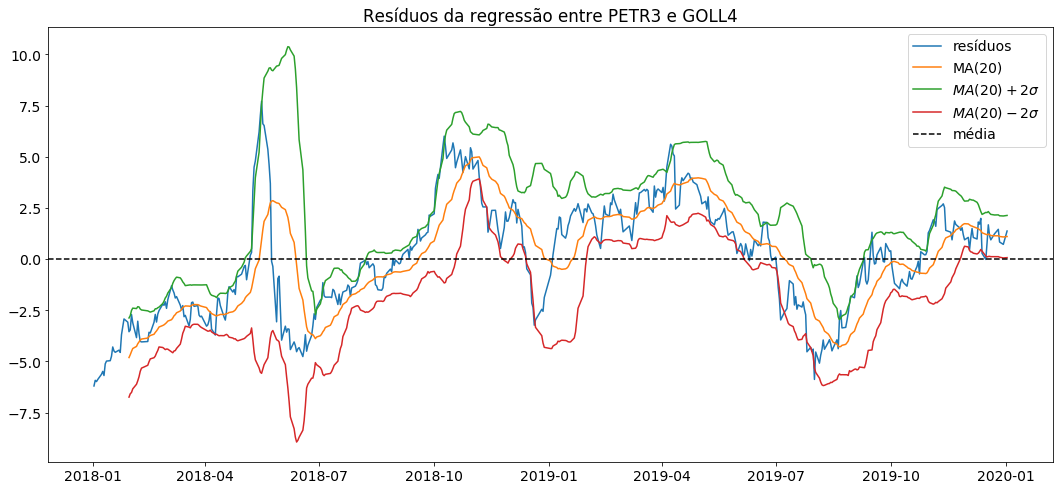

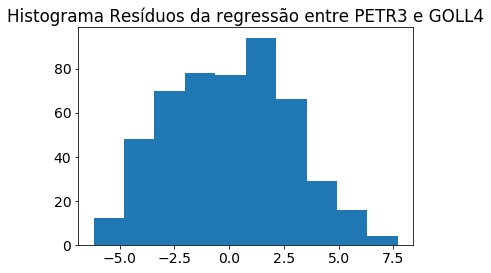

Equação de Regressão:


<IPython.core.display.Math object>

______________________________________________________________________________________________________________


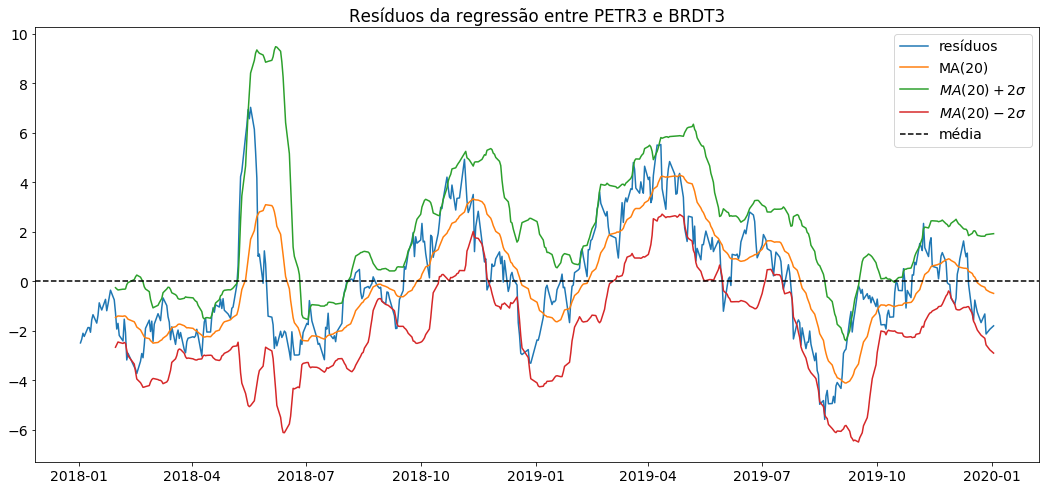

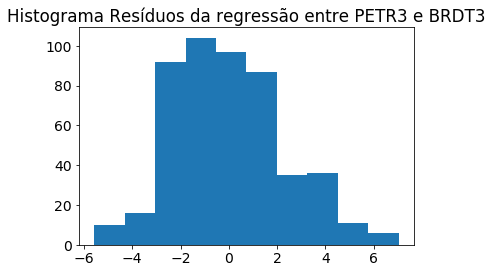

Equação de Regressão:


<IPython.core.display.Math object>

______________________________________________________________________________________________________________


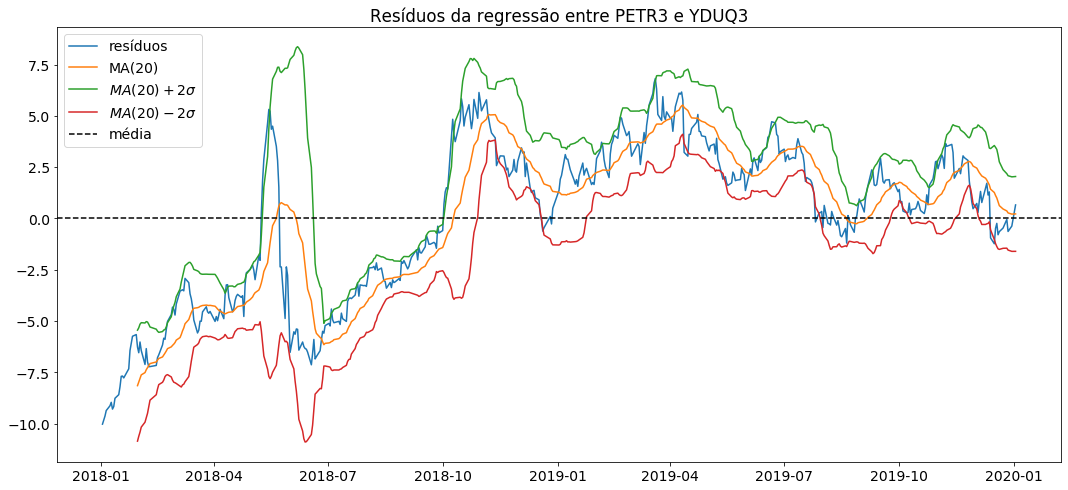

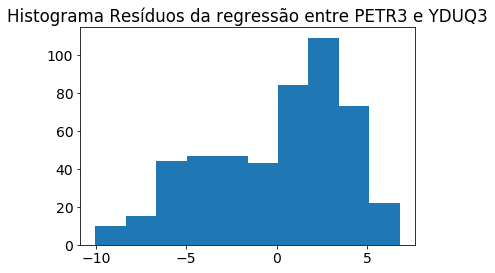

Equação de Regressão:


<IPython.core.display.Math object>

______________________________________________________________________________________________________________


In [7]:
from IPython.display import display, Math
plt.rcParams.update({'font.size': 14}) # Aumenta fonte e números dos eixos nos gráficos
samples_stocks = df_residuals.sample(3, axis=1, random_state=42).columns

for stock in samples_stocks:
    plt.subplots(figsize=(18, 8))
    
    plt.plot(df_residuals[stock], label='resíduos')
    
    ma = df_residuals[stock].rolling(20).mean()
    plt.plot(ma, label='MA(20)')
    
    std = df_residuals[stock].rolling(20).std()
    
    top_2sigma = ma + (2 * std)
    plt.plot(top_2sigma, label='$MA(20) + 2\sigma$')
    
    bottom_2sigma = ma - (2 * std)
    plt.plot(bottom_2sigma, label='$MA(20) - 2\sigma$')
    
    plt.axhline(df_residuals[stock].mean(), color='black', linestyle='--', label='média')
    plt.title(f'Resíduos da regressão entre PETR3 e {stock}')
    plt.legend()
    plt.show()
    
    plt.hist(df_residuals[stock])
    plt.title(f'Histograma Resíduos da regressão entre PETR3 e {stock}')
    plt.show()
    
    alpha, beta, error = df_linreg.loc[stock].round(2)
    print('Equação de Regressão:')
    display(Math(f'$Y = {alpha} + {beta} X + {error}$'))
    print('_'*110)

---

# Questão 2

---

Separando *in-sample* e *out-of-sample*

In [8]:
# leitura dos dados
df_prices = pd.read_csv('IBOV.csv', parse_dates=['Date'], index_col='Date')
# Remove IBOV
ibov = df_prices['IBOV']
df_prices.drop('IBOV', axis=1, inplace=True)
# retornos in-sample
in_sample = df_prices.loc['2019':'2020-01-02'].pct_change().dropna()
# retornos out-of-sample
out_of_sample = df_prices.loc['2020-01-02':].pct_change().dropna() 

Definindo modelo de markowitz usando CPLEX

In [9]:
from docplex.mp.model import Model

def markowitz(covariance_matrix, upper_bound, lower_bound, returns=None, min_return=None):

    model = Model(name='markowitz')
    model.float_precision = 4 # setando modelo para precisão de 4 casa decimais
    N = len(covariance_matrix.columns) # constante (número de ativos)

    # variáveis de decisão 
    w = model.continuous_var_list(covariance_matrix.columns, name='w', ub=upper_bound, lb=lower_bound)

    # restrições
    model.add_constraint(model.sum(w) == 1) # pesos
    if returns is not None: # retorno esperado
        model.add_constraint(model.sum([w[i] * returns.values[i] for i in range(N)]) >= min_return)

    # função objetivo
    corr_exp = model.sum([1/2 * w[i] * w[j] * covariance_matrix.values[i][j] for i in range(N) for j in range(N)])
    model.minimize(corr_exp)

    # resolve modelo
    model.solve()

    # solução (pesos)
    index = [w[i].get_name().replace('w_', '') for i in range(N)]
    weights = [w[i].solution_value for i in range(N)]
    solution = pd.Series(index=index, data=weights) #.sort_values()
    
    return solution

Função para plotar pesos, retorno in-sample e out-of-sample do portfólio

In [10]:
def plot_weights(weights, title):
    plt.figure(figsize=(18, 6))
    plt.title(title)
    sns.barplot(weights.index, weights.values)
    plt.xticks(rotation=90)
    plt.show()
    
def get_weighted_return(weights, returns):
    return returns.apply(lambda x: x * weights[x.name]).sum(axis=1)

Obtendo os pesos dos 3 portfólios:

In [11]:
expected_returns = in_sample.mean() # Retornos esperados in-sample
in_sample_cov = in_sample.cov() # Matriz de covariância in-sample
# Resolve modelos
w_p1 = markowitz(in_sample_cov, upper_bound=1, lower_bound=-1)
w_p2 = markowitz(in_sample_cov, upper_bound=1, lower_bound=0.0001)
w_p3 = markowitz(in_sample_cov, upper_bound=1, lower_bound=0.0001, returns=expected_returns, min_return=0.003)

In [12]:
# Verificando se há algum ativo com: -0.0001 < peso < 0.0001
w_p1[(w_p1 < 0.0001) & (w_p1 > -0.0001)]

BTOW3    0.0001
dtype: float64

In [13]:
# Verificando se há algum ativo com: 0 < peso < 0.0001
w_p2[(w_p2 < 0.0001) & (w_p2 > 0)]

Series([], dtype: float64)

In [14]:
# Verificando se há algum ativo com: 0 < peso < 0.0001
w_p3[(w_p3 < 0.0001) & (w_p3 > 0)]

Series([], dtype: float64)

## Pesos dos Portfólios

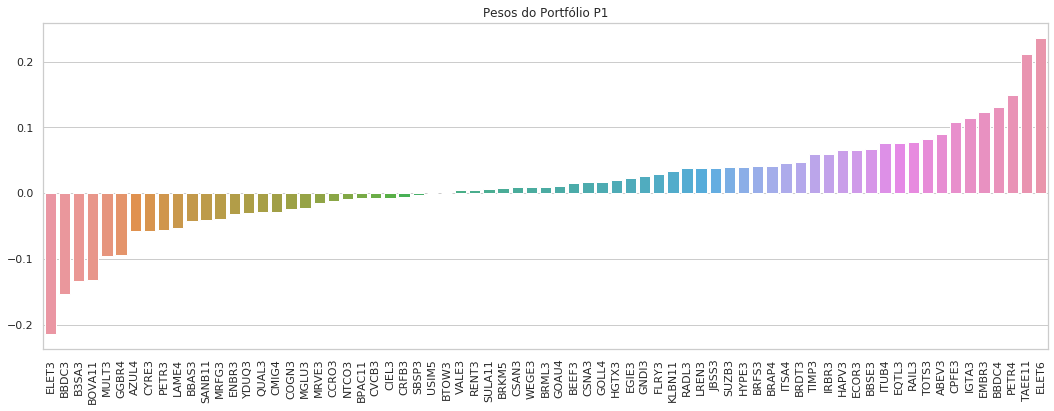

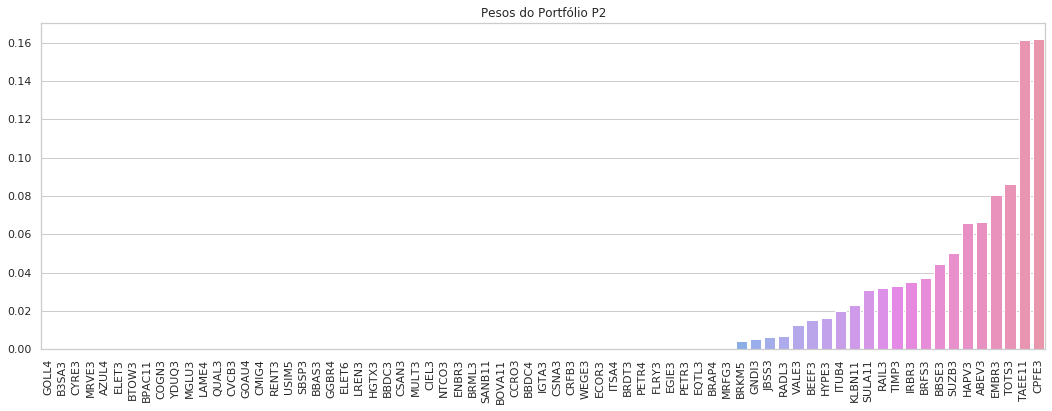

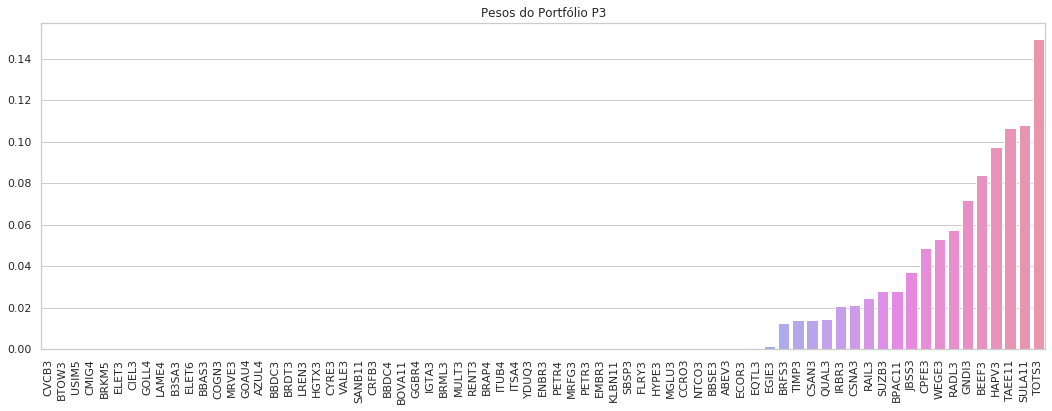

In [15]:
import seaborn as sns; sns.set(style='whitegrid')
for i, w in enumerate([w_p1, w_p2, w_p3]):
    plot_weights(w.sort_values(), title=f'Pesos do Portfólio P{i+1}')

## Performance dos Porfólios

Obtendo retornos *in-sample*:

In [16]:
cols = ['P1', 'P2', 'P3']
in_sample_rets = [get_weighted_return(w, in_sample) for w in [w_p1, w_p2, w_p3]]
df_in_sample = pd.concat(in_sample_rets, axis=1)
df_in_sample.columns = cols

Obtendo retornos *out-of-sample*:

In [17]:
def get_returns(weights, C):
    rebalanced_weights = ((weights * C)/df_prices.loc[out_of_sample.index]).apply(lambda row: row/row.sum(), axis=1)
    return (out_of_sample * rebalanced_weights).sum(axis=1)

# Com rebalanceamento diário sem recálculo
out_sample_rets = [get_returns(w, C=1) for w in [w_p1, w_p2, w_p3]]
df_out_sample = pd.concat(out_sample_rets, axis=1)
df_out_sample.columns = cols

# Sem rebalanceamento
out_sample_rets2 = [get_weighted_return(w, out_of_sample) for w in [w_p1, w_p2, w_p3]]
df_out_sample2 = pd.concat(out_sample_rets2, axis=1)
df_out_sample2.columns = cols

Plot dos retornos considerano um investimento inicial de R$1

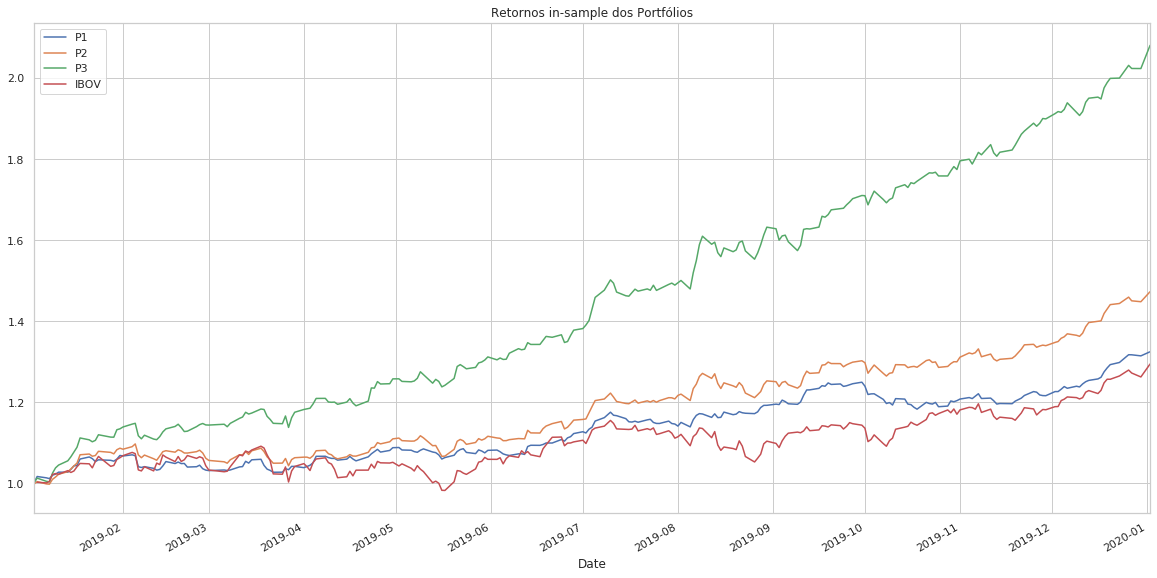

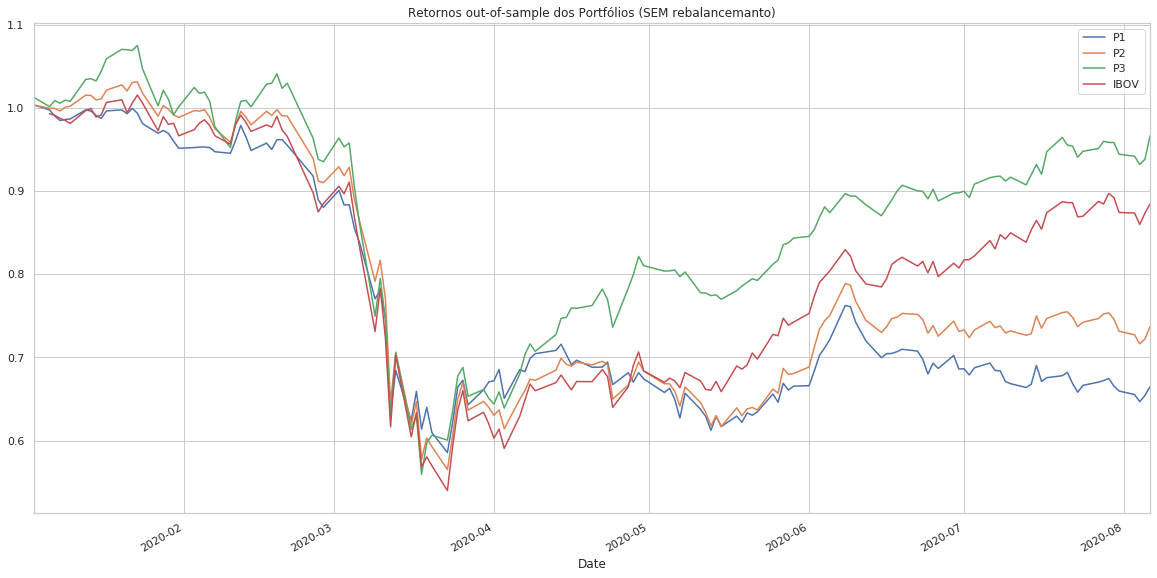

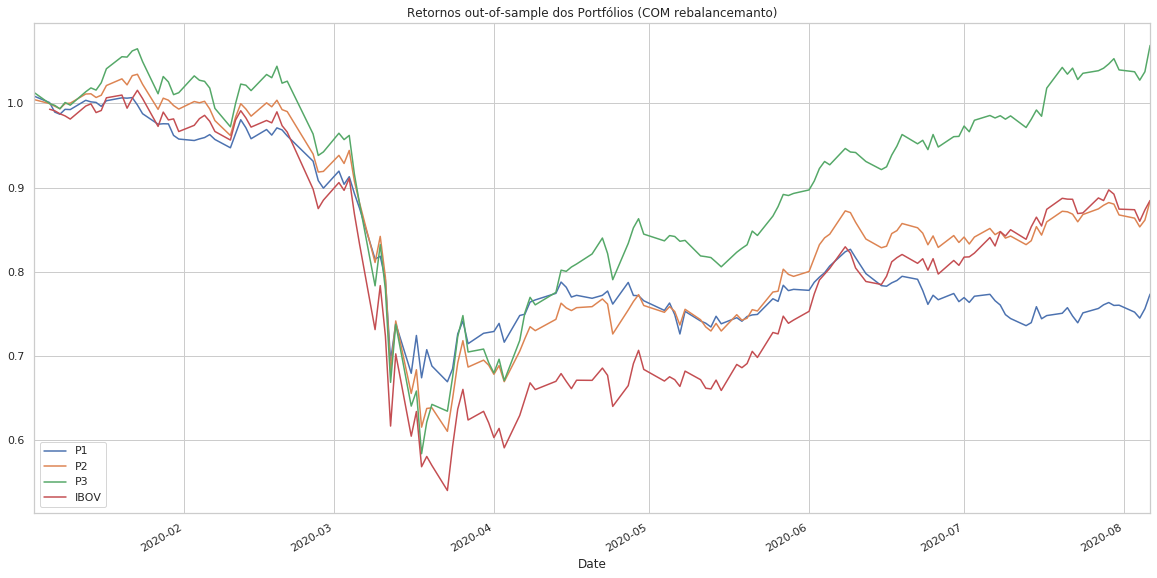

In [18]:
# in-sample
df_in_sample.add(1).cumprod().plot(figsize=(20, 10), title='Retornos in-sample dos Portfólios')
ibov.loc[df_in_sample.index].pct_change().add(1).cumprod().plot(label='IBOV')
plt.legend()
plt.show()
# out-of-sample (Sem rebalancemanto)
df_out_sample.add(1).cumprod().plot(figsize=(20, 10), title='Retornos out-of-sample dos Portfólios (SEM rebalancemanto)')
ibov.loc[df_out_sample.index].pct_change().add(1).cumprod().plot(label='IBOV')
plt.legend()
plt.show()
# out-of-sample (Com rebalancemanto)
df_out_sample2.add(1).cumprod().plot(figsize=(20, 10), title='Retornos out-of-sample dos Portfólios (COM rebalancemanto)')
ibov.loc[df_out_sample.index].pct_change().add(1).cumprod().plot(label='IBOV')
plt.legend()
plt.show()

Média de desvio padrão dos portfólios

In [19]:
print('in-sample:')
display(df_in_sample.aggregate(['mean', 'std']))
print('out-of-sample:')
display(df_out_sample.aggregate(['mean', 'std']))
display(df_out_sample2.aggregate(['mean', 'std']))

in-sample:


,P1,P2,P3
mean,0.001154,0.001594,0.003000
std,0.006071,0.007701,0.008927


out-of-sample:


,P1,P2,P3
mean,-0.002345,-0.001559,0.000317
std,0.027702,0.030744,0.032591


,P1,P2,P3
mean,-0.001469,-0.000437,0.000953
std,0.022392,0.027618,0.031437


In [20]:
df_in_sample.add(1).prod().sub(1)

P1    0.325183
P2    0.473484
P3    1.081523
dtype: float64

In [21]:
df_out_sample2.add(1).prod().sub(1)

P1   -0.226634
P2   -0.116024
P3    0.068777
dtype: float64

In [22]:
df_out_sample.add(1).prod().sub(1)

P1   -0.335146
P2   -0.262830
P3   -0.033574
dtype: float64

Os valores não estão condizentes com os valores calculados in-sample, é um exemplo de que bons retornos e baixas volatilidades passadas não serão análogos no futuro. Um fator de peso é a baixa de preços no perído de Março à Abril.

---

# Questão 3

---

<center><strong>Formalização do novo Modelo:

$$
\begin{array}{c}
    & \mathbf{min} && \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}{w_i w_j \sigma_{ij}} & && \tag{1}\\
\\
    & \mathbf{sujeito\ a} && \sum_{i=1}^{N}{w_i} = 1  \\
\\
    & && -0.10 \le w_{i} \le  0.10 & \forall i = 1, \dots, N\\
\\
    & && \sum_{w \in W} {w \le 0.30}
\end{array}
$$

<center><b>Constantes:

$$
\begin{array}{c}
    & N && \text{Número de Estratégias} && \\
    & W \subset N && \text{Conjunto de ativos que fazem parte do setor de tecnologia} \\
   & \sigma && \text{Matriz de covariância}
   & 
\end{array}
$$

<center><b>Variáveis:

$$
\begin{array}{c}
    & w_{i} \in \mathbb{R} & \forall i=1,\dots,N && \text{Peso dos ativos}
\end{array}
$$

---

Converte Notebook para HTML

In [1]:
!jupyter nbconvert lista_2.ipynb --template toc2

[NbConvertApp] Converting notebook lista_2.ipynb to html
[NbConvertApp] Writing 1430850 bytes to lista_2.html
